In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
data = pd.read_csv("Crop_recommendation.csv")

In [8]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
data.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [18]:
data.shape

(2200, 8)

In [20]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [22]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [24]:
data.duplicated().sum()

0

In [26]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [28]:
label_count = data['label'].value_counts()

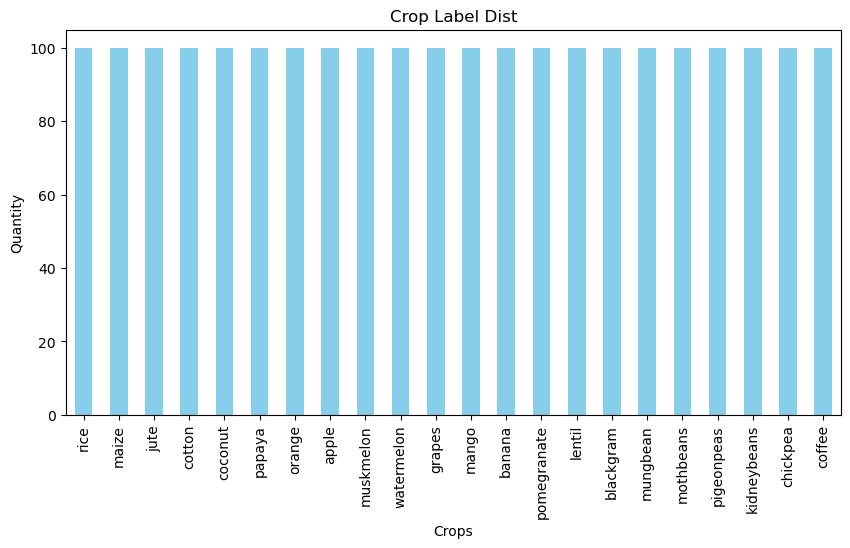

In [30]:
plt.figure(figsize=(10,5))
label_count.plot(kind = 'bar', color= 'skyblue')
plt.title("Crop Label Dist")
plt.xlabel("Crops")
plt.ylabel("Quantity")
plt.show()

# ML


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [35]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [39]:
X = data[['N', 'P', 'K', 'temperature',	'humidity',	'ph', 'rainfall']]
y = data['label']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df

,N,P,K,temperature,humidity,ph,rainfall
0,-1.371628,-1.072910,-0.673510,0.819481,0.924395,0.937545,0.199440
1,-1.127411,2.084513,3.015261,0.783251,0.426613,-1.153846,-0.643677
2,-1.073140,0.536162,-0.476250,-0.879968,-2.186291,-1.107452,0.694001
3,-0.340487,-0.465713,-0.594606,0.138043,-0.459237,-0.229482,-1.231744
4,-0.883193,-1.255069,-0.791866,-2.563232,0.915842,-0.341959,0.289941
...,...,...,...,...,...,...,...
1755,-1.018869,0.323643,-0.555154,-1.274842,-0.396933,0.149081,-1.218366
1756,-0.937463,0.050404,-0.574880,-1.194399,-1.087561,-0.076988,1.618598
1757,0.853467,-0.162115,-0.239537,0.036250,0.464759,-0.155483,1.633233
1758,1.070550,-0.101395,-0.081729,0.257343,0.092922,-0.281484,1.237246


In [66]:
models = {
    "Random Forest" : RandomForestClassifier(n_estimators=200,random_state=42),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression" : LogisticRegression(max_iter=200,random_state=42),
    "SVM(RBF)" : SVC(kernel='rbf',random_state=42),
}

In [70]:
result = []
for name,model in models.items():
    if name in ["KNN","Logistic Regression","SVM(RBF)"]:
        model.fit(X_train_scaled,y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train,y_train)
        preds = model.predict(X_test)

    acc = accuracy_score(y_test,preds)
    result.append((name,acc))

In [72]:
result

[('Random Forest', 0.9954545454545455),
 ('Decision Tree', 0.9795454545454545),
 ('KNN', 0.9795454545454545),
 ('Logistic Regression', 0.9727272727272728),
 ('SVM(RBF)', 0.9840909090909091)]

In [74]:
import pickle as pkl


In [78]:
best_model = RandomForestClassifier(n_estimators=200,random_state=42)
best_model.fit(X_train,y_train)
preds = best_model.predict(X_test)
acc = accuracy_score(y_test,preds)
print(f"Best model accuracy:{acc * 100}")

Best model accuracy:99.54545454545455


In [80]:
bundle = {
    "model" : best_model,
    "feature_cols" : ['N', 'P', 'K', 'temperature',	'humidity',	'ph', 'rainfall'],
    "classes" : best_model.classes_
}

In [92]:
with open('Crop_recommendation_RF.pkl','wb') as f:
    pkl.dump(bundle,f)
    print("model saved as Crop_recommendation_RF.pkl")

model saved as Crop_recommendation_RF.pkl


# checking

In [95]:
with open('Crop_recommendation_RF.pkl','rb') as f:
    b = pkl.load(f)



RandomForestClassifier(n_estimators=200, random_state=42)


In [97]:
print(type(b["model"]), b["feature_cols"],b["classes"])

<class 'sklearn.ensemble._forest.RandomForestClassifier'> ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'] ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [99]:
sample = {
    'N':90, 'P':40, 'K':40, 'temperature':20, 'humidity':80,'ph':7, 'rainfall':200
}
X = [[sample[c] for c in b["feature_cols"]]]
X

[[90, 40, 40, 20, 80, 7, 200]]

In [105]:
print(f"Pred: {b["model"].predict(X)}")

Pred: ['rice']


C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
